In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import colorsys
import numpy as np
import matplotlib.colors as mc

In [2]:
colors = ['#ccece6', '#99d8c9', '#66c2a4', '#41ae76', '#238b45', '#006d2c', '#00441b']

In [3]:
def hex_to_rgb(hexval):
    d = hexval.strip('#')
    rgb = [int(d[x:x+2], 16) for x in range(0, len(d), 2)]
    return rgb

def rgb_to_hex(rgb):
    #decide if rgbs are floating points between 0 or 1
    if all((val >= 0) and (val<=1) and isinstance(val, float) for val in rgb):
        #convert to values within 255
        rgb = [int(x*255) for x in rgb]
    if all((val >= 0) and (val<=255) for val in rgb):
        return "#{:02x}{:02x}{:02x}".format(int(rgb[0]),int(rgb[1]),int(rgb[2]))
    else:
        raise ValueError("rgb values should be within 0-255")

def rgb_to_hls(rgbval):
    h, l, s = colorsys.rgb_to_hls(rgbval[0]/float(255), rgbval[1]/float(255), rgbval[2]/float(255))
    return [h, l, s]

def hls_to_rgb(hls):
    rgb = colorsys.hls_to_rgb(hls[0], hls[1], hls[2])
    rgb = [int(x*255) for x in rgb]
    return rgb

In [4]:
def brighten(color, fraction=0.05):
    
    rgbval = hex_to_rgb(color)
    hls = rgb_to_hls(rgbval)
    
    #now adjust luminescence - 
    hls[1] =min((1+fraction)*hls[1], 1)
    
    rgb = colorsys.hls_to_rgb(hls[0], hls[1], hls[2])
    hexv = rgb_to_hex(rgb)
    return hexv

In [5]:
def mix_colors(color1, color2, ratio=0.5):
    
    rgb1 = hex_to_rgb(color1)
    rgb2 = hex_to_rgb(color2)
    
    rgb = [ratio*rgb1[x] + (1-ratio)*rgb2[x] for x in range(3)]
    hexv = rgb_to_hex(rgb)
    
    return hexv

In [6]:
def find_intermediate_colors(color1, color2, colors=1, ignore_edges=False):

    rgb1 = hex_to_rgb(color1)
    rgb2 = hex_to_rgb(color2)

    #now find intermediate points
    rpoints = np.linspace(rgb1[0], rgb2[0], colors+2)
    gpoints = np.linspace(rgb1[1], rgb2[1], colors+2)
    bpoints = np.linspace(rgb1[2], rgb2[2], colors+2)
    
    #stack to pairs
    if ignore_edges:
        new_rgbs = np.stack((rpoints[1:-1], gpoints[1:-1], bpoints[1:-1]), axis=-1)
    else:
        new_rgbs = np.stack((rpoints, gpoints, bpoints), axis=-1)
    
    #convert to hexvals
    hexvals = [rgb_to_hex(rgb) for rgb in new_rgbs]
    return hexvals

In [7]:
def create_colormap(colors):
    cmap = mc.LinearSegmentedColormap.from_list("", colors)
    return cmap

In [8]:
def plot_colors(colors):
    fig = plt.figure(figsize=[len(colors), 1.5])
    spec = gridspec.GridSpec(ncols=len(colors), nrows=2, figure=fig)

    for count, color in enumerate(colors):
        ax1 = fig.add_subplot(spec[0, count])
        ax1.fill([0,1,1,0],[0,0,1,1], color=color)
        ax1.set_ylim(0,1)
        ax1.set_xlim(0,1)
        plt.axis("off") 
        ax2 = fig.add_subplot(spec[1, count])
        ax2.plot([0,1],[0.25,0.25], color=color, linewidth=3)
        ax2.set_ylim(0,0.5)
        ax2.set_xlim(0,0.5)
        plt.axis("off") 
    plt.subplots_adjust(wspace=0, hspace=0)

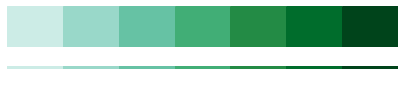

In [9]:
plot_colors(colors)

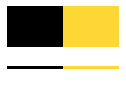

In [14]:
dcolor = brighten('#FDD835', -1)
ar = [dcolor, '#FDD835']
plot_colors(ar)

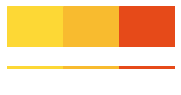

In [15]:
y1 = '#FDD835'
y2 = '#E64A19'
y3 = mix_colors(y1, y2, 0.8)
plot_colors([y1, y3, y2])

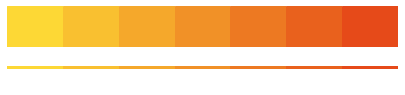

In [16]:
y1 = '#FDD835'
y2 = '#E64A19'
y3 = find_intermediate_colors(y1, y2, 5)
plot_colors(y3)

/home/users/azocaagn/anaconda2/envs/pychromatic/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


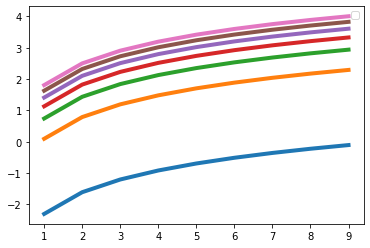

In [18]:
    for count, color in enumerate(colors):
        plt.plot(np.arange(0,10), np.log(np.arange(0,10)*(count+1/10.0)), linewidth=4)
        plt.legend() 

In [19]:
def plot_colors(colors):
    fig, axs = plt.subplots(1, 3, figsize=(17, 5))
    for count, color in enumerate(colors):
            x = np.arange(11)
            y = np.sin(x/(1.75*np.pi))
            axs[0].plot(x, y+count/3., color=color, label="%s"%color, linewidth=4)
    axs[1].pie((np.random.dirichlet(np.ones(len(colors)),size=1)*100)[0], colors=colors, autopct='%1.1f%%', startangle=90)
    axs[1].axis('equal')
    axs[2].bar(np.arange(len(colors)), np.arange(len(colors))+1,color=colors,linewidth=0)
    axs[2].set_xticks(np.arange(len(colors))+0.4)
    plt.show()

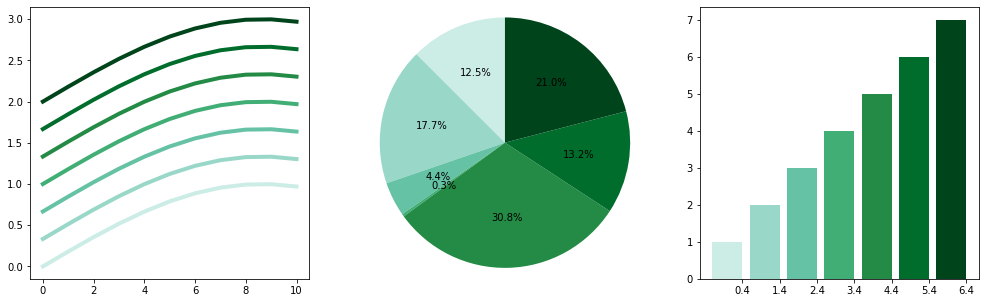

In [20]:
plot_colors(colors)

In [21]:
colors

['#ccece6', '#99d8c9', '#66c2a4', '#41ae76', '#238b45', '#006d2c', '#00441b']

In [31]:
class set2:
    def __init__(self):
        self.colors = ['#ccece6', '#99d8c9']
    
    def get_colors(self):
        return self.colors

In [39]:
t = set3()
plot_colors(t.get_colors())

AttributeError: 'dict' object has no attribute 'vals'

In [42]:
t.colors[0]

KeyError: 0